##### Текущий список вопросов к проектному заданию.
Полные данные и подробное описание задачи можно найти здесь
###### Признаки какого вида встречаются в данных?
Открыть данные с помощью pandas и посмотреть на первые несколько строк таблицы.
###### Найти самые популярные и редкие слова в тексте (здесь и далее речь идет о поле FullDescription). Объяснить почему именно эти слова встречаются так часто или так редко.
Прочитать про класс sklearn.feature_extraction.text.CountVectorizer, его методы fit и transform. Понять как кодирующей матрице получить частоты слов.
###### Построить распределение целевой переменной. Посчитать её среднее значение, медиану, дисперсию. Как выглядят объявления, в которых предлагается очень маленькая и очень большая зарплата? При выполнении задания полезным может оказаться метод pandas.DataFrame.quantile.
Освежить в памяти занятия по pandas. Плотность можно построить с помощью метода pandas.DataFrame.hist, остальные функции не составит труда найти.
###### Предлагаемый авторами задания критерий качества - среднее абсолютное отклонение предсказания. Вычислить значение ошибки предсказания, если в качестве предсказания будет использоваться среднее значение зарплаты.
Подумайте, может ли какое-то другое число давать меньшее значение ошибки?
###### Найти слова, которые часто встречаются рядом: пары, тройки. Можно ли как-то объяснить их соседство?
Продолжить знакомство с классом sklearn.feature_extraction.text.CountVectorizer, обратить внимание на параметр ngram_range.
###### Для нескольких слов постройте распределение числа их вхождений в текст. Каким известным распределением можно описать получившуюся зависимость?
Некоторые слова встречаются в текстах редко. Можно попробовать строить распределение на основе только тех текстов, в которых встречается данное слово. Здесь может помочь функция numpy.nonzero().

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import random
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
#задание 1
data = pd.read_csv('shrinked_data.csv.tar.gz')
data.head()

,shrinked_data.csv,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,96318,69249293,Mobile Desktop Support Analyst,Introduction A Support Analyst with experience...,London,London,NaN,NaN,Matchtech Group plc.,Engineering Jobs,Up to 32/hr,61440,rengineeringjobs.com
1,166582,71298764,Occupational Therapist,OT Role Birmingham At Recruiting for Care thi...,"Birimingham, Birmingham",UK,part_time,contract,Recruiting for Care,Social work Jobs,20 - 30/hour,48000,cv-library.co.uk
2,36385,68256674,Regional Sales Executive,"Our client, who is one of the UKs largest indu...",Leeds,Leeds,NaN,permanent,NaN,HR & Recruitment Jobs,15k - 20k,17500,careersinrecruitment.com
3,80896,69023774,Domiciliary Branch Manager Welwyn Garden City,Our client is currently recruiting for an expe...,"Welwyn Garden City, Hertfordshire",Welwyn Garden City,NaN,permanent,Maxim recruitment Solutions,Social work Jobs,29000 - 31000/annum,30000,cv-library.co.uk
4,90305,69165486,Digital communities editor,We are a global charitable foundation dedicate...,London,London,NaN,NaN,Wellcome trust,Creative & Design Jobs,"28,000 dependant on experience",28000,journalism.co.uk


In [ ]:
#задание 2
texts = data['FullDescription']
vectorizer = CountVectorizer(analyzer = 'word', stop_words = 'english', lowercase = True)
vocub = vectorizer.fit_transform(texts).toarray()
words = np.sum(vocub, axis = 0)
index = np.argsort(words)
popular = np.array(vectorizer.get_feature_names())[index[-50:]]
print('popular:', ", ".join(words_pop))
rare = np.array(vectorizer.get_feature_names())[index[:50]]
print('rare:', ", ".join(words_rare))

mean =  34136.196674429055
median =  30000.0
variance =  316129147.81440276


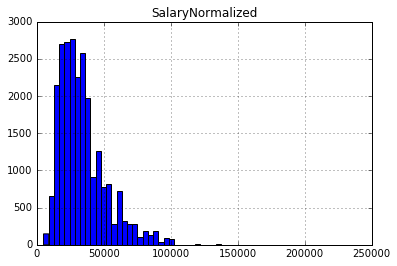

In [8]:
#задание 3
salary = data['SalaryNormalized']
salary_hist = pd.DataFrame.hist(pd.DataFrame(salary), bins = 50)

print('mean = ', salary.mean())
print('median = ', salary.median())
print('variance = ', salary.var())

In [57]:
ind = data['SalaryNormalized'].min()
data.loc[data['SalaryNormalized'] == ind, ['FullDescription']] #наименьшие зарплаты

,FullDescription
287,An opportunity has arisen with an employer in ...
1454,This is for an Apprenticehip position based in...
4610,Apprenticeship in Diesel Fuel Injection Engine...
5308,The employer is looking for someone enthusiast...
6841,This is a government funded apprenticeship. Yo...
7306,This apprenticeship will be training as a chef...
7491,The employer has given the assurance that the ...
9374,Entry Requirements: You must have or are predi...
11108,Are you looking to kick start your career? Do ...
12076,Apprenticeship under the 'Government Apprentic...


In [58]:
ind = data['SalaryNormalized'].max()
data.loc[data['SalaryNormalized'] == ind, ['FullDescription']] #наибольшие зарплаты

,FullDescription
5017,This City firm rsquo;s Hertfordshire office is...


In [59]:
#задание 4
g_mean = np.abs(salary - salary.mean()).mean()
print(g_mean)
g_median = np.abs(salary - salary.median()).mean()
print(g_median)
g_moda = np.abs(salary - salary.mode()).mean()
print(g_moda)

13472.326592591642
13039.709604935246
26440.0


In [7]:
#задание 5
texts = data['FullDescription']
vectorizer = CountVectorizer(analyzer='word', stop_words='english', ngram_range=(2,3), max_features = 100, lowercase=True)
vocub = vectorizer.fit_transform(texts).toarray()
words = np.sum(vocub, axis = 0)
index = np.argsort(words)
popular = np.array(vectorizer.get_feature_names())[index[-20:]]
print('popular:', ", ".join(popular))

popular: previous experience, employment business, track record, send cv, employment agency, customer service, successful candidate, experience working, communication skills, totaljobs com, www totaljobs com, www totaljobs, posted www totaljobs, totaljobs com jobseeking, com jobseeking, originally posted www, posted www, job originally posted, job originally, originally posted
